<a href="https://colab.research.google.com/github/JosefaMonteiro28/AuthenticationJWT/blob/master/Pr%C3%A1tica/Aula/Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas necessárias

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.metrics import confusion_matrix

# Funções auxiliares

In [3]:
def plot_from_sample(samples, labels=None):
    for i in range(len(samples)):
        sample = samples[i]
        plt.subplot(1, len(samples), i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(sample.reshape(28, 28), cmap=plt.cm.binary)
        if labels is not None:
            plt.xlabel(labels[i])

# **Passo 1**: Obter dados

Neste passo, vamos obter o conjunto de dados e separá-lo em dados de treino e em dados de teste.

In [4]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


O objetivo é usar as imagens como entrada na rede neuronal e prever o dígito mais provável.

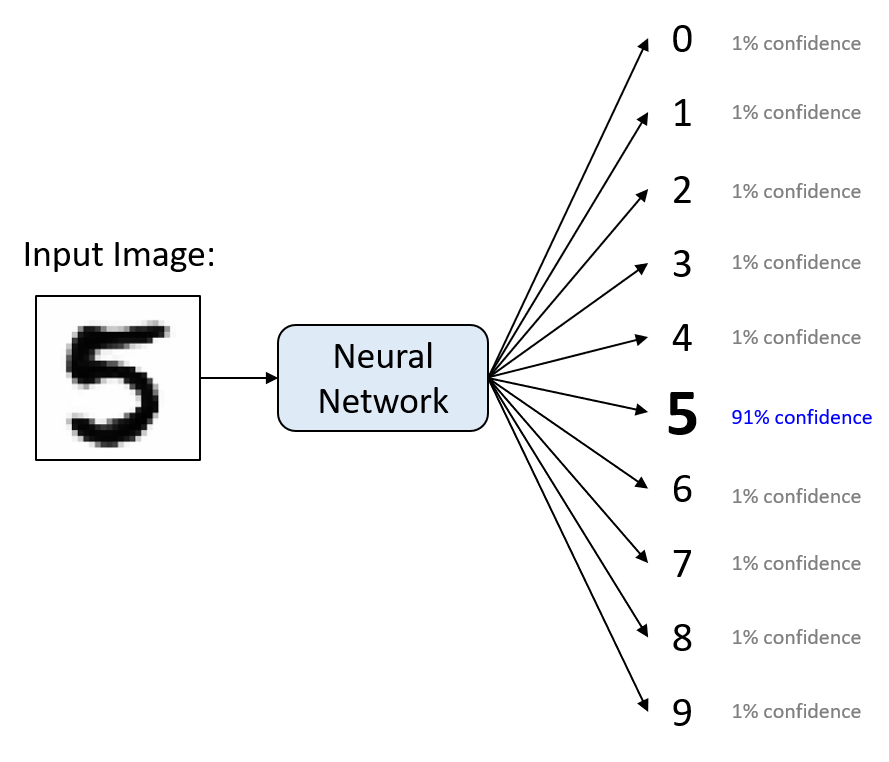

## Vamos explorar um pouco os dados

## Variável ``X``

In [7]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train.max(), X_train.min()

(255, 0)

In [ ]:
#

(255, 0)

Cada linha do ``X_train`` corresponde a uma imagem com 28x28 pixéis. O conjunto de dados tem um total de 6 000 exemplos.

É importante notar que todas as imagens estão numa escala cinzenta (caso contrário, teríamos para cada píxel 3 dimensões). Todos os valores em X (pixéis) variam entre 0 e 255.

## Variável ``Y``

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# **Passo 2**: Pré-processamento dos dados

In [14]:
X_train = X_train/ 255
X_test = X_test / 255

In [15]:
np.unique(X_train)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

# **Passo 3**: Preparação dos dados

In [36]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [37]:
X_train.shape

(60000, 784)

In [34]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# **Passo 4**: Inicialização do modelo

In [47]:
model = tf.keras.models.Sequential()

model.add( tf.keras.Input(shape =(784,)) )
model.add( tf.keras.layers.Dense(128, activation='relu') )
model.add( tf.keras.layers.Dense(10, activation='softmax') )

**Porquê 784?**

In [48]:
model.input_shape

(None, 784)

In [49]:
model.output_shape

(None, 10)

## Compilar o modelo

In [50]:
model.compile(
    optimizer = 'SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Vamos confirmar se era realmente isto o pretendido...

In [51]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# **Passo 5**: Treino do modelo

In [44]:
callback =

SyntaxError: invalid syntax (<ipython-input-44-4151c7df84d6>, line 1)

In [54]:
history = model.fit(
    X_train,
    y_train,
    epochs = 50,
    batch_size = 64
)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9878 - loss: 0.0481
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9882 - loss: 0.0470
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9888 - loss: 0.0444
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9885 - loss: 0.0455
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9888 - loss: 0.0456
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9897 - loss: 0.0418
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9892 - loss: 0.0439
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9888 - loss: 0.0439
Epoch 9/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9897 - loss: 0.0417
Epoch 10/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9885 - loss: 0.0438
Epoch 11/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9900 - loss: 0.0422
Epoch 12/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

### Curva da função de perda de treino

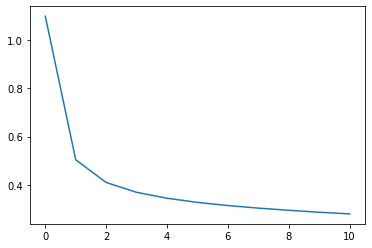

In [ ]:
plt.plot(history.history['loss'])

### Curva da função de perda de validação

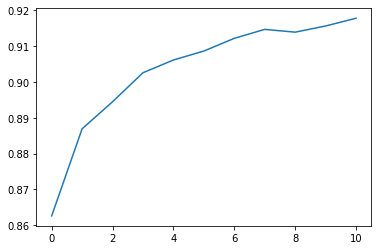

In [ ]:
plt.plot(history.history['val_accuracy'])

# **Passo 6**: Avaliação do modelo

In [56]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss, train_acc = model.evaluate(X_train, y_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9730 - loss: 0.0862
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9939 - loss: 0.0282


313/313 [==============================] - 1s 2ms/step - loss: 0.2717 - accuracy: 0.9236


313/313 [==============================] - 0s 1ms/step


## Matriz de confusão

In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[5733,    0,   18,   12,   11,   43,   39,    5,   54,    8],
       [   2, 6544,   24,   24,    6,   34,    8,    8,   79,   13],
       [  39,   58, 5306,   90,   80,   26,   85,   61,  184,   29],
       [  23,   30,  122, 5452,    4,  225,   23,   42,  149,   61],
       [  15,   34,   26,    6, 5331,    5,   75,    8,   39,  303],
       [  70,   26,   34,  150,   52, 4742,   99,   15,  163,   70],
       [  43,   19,   34,    1,   56,   56, 5672,    0,   36,    1],
       [  34,   59,   92,   21,   66,    8,    2, 5740,   21,  222],
       [  29,  126,   62,  106,   19,  152,   48,   10, 5210,   89],
       [  36,   37,   23,   75,  121,   33,    4,   86,   58, 5476]])

In [57]:
y_test_pred = model.predict(X_test).argmax(axis=1)

confusion_matrix(y_test, y_test_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[ 968,    0,    1,    1,    2,    1,    2,    1,    2,    2],
       [   0, 1125,    2,    1,    0,    1,    2,    1,    3,    0],
       [   3,    0, 1014,    2,    2,    0,    2,    6,    3,    0],
       [   0,    0,    2,  986,    0,    5,    0,    7,    4,    6],
       [   2,    0,    1,    1,  960,    0,    3,    3,    1,   11],
       [   2,    0,    0,    7,    2,  868,    7,    0,    4,    2],
       [   5,    3,    3,    1,    3,    3,  938,    0,    2,    0],
       [   1,    5,    8,    3,    1,    0,    0, 1002,    2,    6],
       [   4,    0,    4,    6,    4,    3,    3,    2,  946,    2],
       [   2,    3,    2,    4,   11,    1,    1,    7,    5,  973]])

# Exercício

Crie uma rede neuronal capaz de predizer, através de imagens 28x28, qual a categoria de vestuário que consta da imagem. O conjunto de dados é aplamente conhecido por _Fashion MNIST_, e está diponível em [https://www.kaggle.com/zalando-research/fashionmnist](https://https://www.kaggle.com/zalando-research/fashionmnist).

Alternativamente, o conjunto de dados pode ser carregado da seguinte forma:
```python
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
```

A rede neuronal deverá possuir 3 camadas ocultas (com 50, 25, 25 unidades), com a função de activação ``sigmoid``.

Implemente paragem atenticipada no conjunto de dados de validação, com um valor de ``patience`` e de ``min_delta`` escolhidos por si. Os dados de validação deverão consistir de 20% dos dados de treino.

Para treinar a rede, utilize um algoritmo de otimização **diferente** do gradiente descendente estocástico. Defina  ``epochs=50`` e ``batch_size=64``.

Avalie o modelo e compare-o com um modelo com menos camadas ocultas (por exemplo, 2 camadas ocultas).